# Question 1 

Q1: What proportion of students who answer this question quickly will pass the class?
Assume the probability of passing the class is 0.9.
Assume the probability of answering this question quickly is 0.6 if you'll pass the class,
while the probability drops to 0.3 if you'll not pass the class. 


\begin{align*}
\Pr(\text{Pass} \mid \text{Quick}) &= \frac{\Pr(\text{Quick} \mid \text{Pass}) \cdot \Pr(\text{Pass})}{\Pr(\text{Quick})} \\
\text{The given probabilities are:} \\
\Pr(\text{Quick} \mid \text{Pass}) &= 0.6 \\
\Pr(\text{Quick} \mid \text{Not Pass}) &= 0.3 \\
\Pr(\text{Pass}) &= 0.9 \\
\Pr(\text{Not Pass}) &= 1 - \Pr(\text{Pass}) = 0.1 \\
\text{Using the law of total probability:} \\
P(\text{Quick}) &= P(\text{Quick} \mid \text{Pass}) \cdot P(\text{Pass}) + P(\text{Quick} \mid \text{Not Pass}) \cdot P(\text{Not Pass})\\
P(\text{Quick}) &= 0.6*0.9+0.3*0.1= 0.57\\
\Pr(\text{Pass} \mid \text{Quick}) &= 0.6*0.9/0.57 = 0.947
\end{align*}

# Question 2
Q2: 
\begin{align*}
\text{Likelihood} && p(x|\theta,n) &= \frac{n!}{x_1! x_2! \cdots x_k!} \prod_{i=1}^k \theta_i^{x_i} \quad \text{(Multinomial distribution)} \\\\
\text{Prior} && p(\theta|\boldsymbol{\alpha}) &= \frac{\Gamma\left(\sum_{i=1}^k \alpha_i\right)}{\prod_{i=1}^k \Gamma(\alpha_i)} \prod_{i=1}^k \theta_i^{\alpha_i - 1} \quad \text{(Dirichlet distribution)} \\\\
\text{Posterior} && p(\theta|x,n,\boldsymbol{\alpha}) &= \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} \\
&&& \quad\quad\quad\quad\quad\; = \; \frac{\Gamma\left(\sum_{i=1}^k (\alpha_i + x_i)\right)}{\prod_{i=1}^k \Gamma(\alpha_i + x_i)} \prod_{i=1}^k \theta_i^{\alpha_i + x_i - 1} \quad \text{(Dirichlet distribution)} \\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \text{With parameterization: } \boldsymbol{\alpha}' = \boldsymbol{\alpha} + x \\
\end{align*}


### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is Dirichlet distribution_**






# Question 3
Q3: Create a sample from a three category multinomial distribution and visualize the multinomial distribution and the multinomial sample; then, visualize the simplex Dirichlet distribution of the prior and the posterior using a ternary plot.


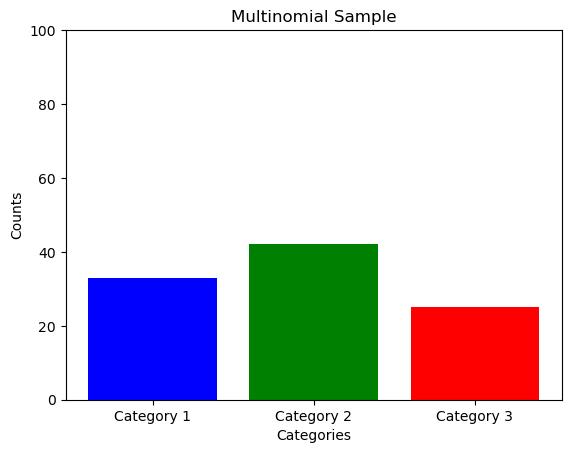

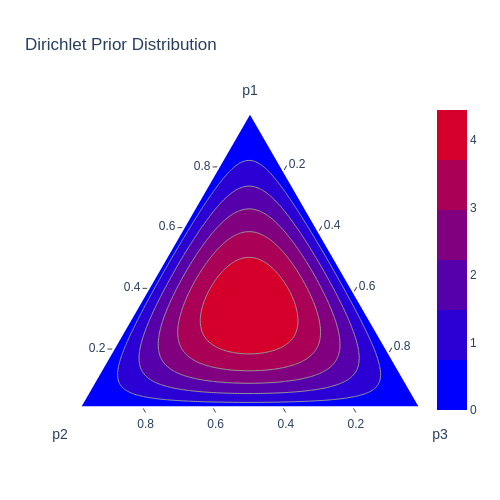

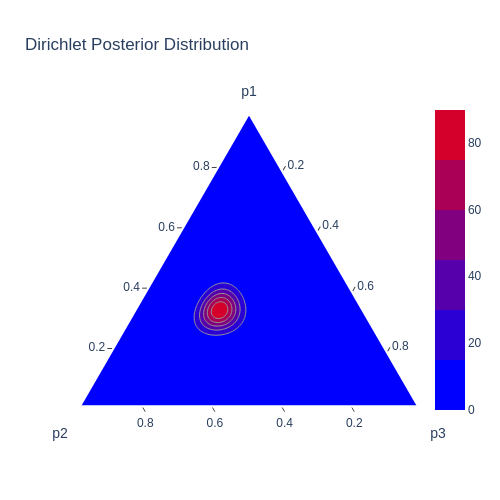

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import dirichlet, multinomial
import plotly.figure_factory as ff

# Step 1: Create a sample from a three-category multinomial distribution
n_trials = 100
true_probabilities = [0.3, 0.5, 0.2]  # Probabilities for the multinomial distribution
multinomial_sample = multinomial.rvs(n_trials, true_probabilities)

# Step 2: Visualize the multinomial sample using a bar plot
categories = ['Category 1', 'Category 2', 'Category 3']
plt.bar(categories, multinomial_sample, color=['blue', 'green', 'red'])
plt.title("Multinomial Sample")
plt.xlabel("Categories")
plt.ylabel("Counts")
plt.ylim(0, n_trials)
plt.savefig("multinomial_sample.png")  # Save the plot for GitHub visibility
plt.show()

# Step 3: Simulate a Dirichlet prior
alpha_prior = np.array([2, 2, 2])  # Symmetric Dirichlet prior

# Step 4: Visualize the Dirichlet prior using a ternary plot
# Generate grid points for the ternary plot
p1 = np.linspace(0, 1, 100)
p2 = 1 - p1.copy()
p_ = np.linspace(0, 1, 100)
p1 = (p1[np.newaxis, :] * p_[:, np.newaxis]).flatten()
p2 = (p2[np.newaxis, :] * p_[:, np.newaxis]).flatten()
p3 = 1 - p1 - p2
p = np.c_[p1, p2, p3]

# Calculate Dirichlet prior densities at grid points
dirichlet_prior = dirichlet(alpha=alpha_prior)
dirichlet_prior_densities = dirichlet_prior.pdf(p.T)

# Create and save a ternary contour plot for the Dirichlet prior
fig = ff.create_ternary_contour(p.T, dirichlet_prior_densities,
                                pole_labels=['p1', 'p2', 'p3'],
                                interp_mode='cartesian',
                                showscale=True)
fig.update_layout(title="Dirichlet Prior Distribution")
fig.write_image("dirichlet_prior.png")  # Save for GitHub visibility
fig.show("png")  # Display as PNG for inline visualization

# Step 5: Update the Dirichlet posterior based on the multinomial sample
alpha_posterior = alpha_prior + multinomial_sample

# Step 6: Visualize the Dirichlet posterior using a ternary plot
# Calculate Dirichlet posterior densities at grid points
dirichlet_posterior = dirichlet(alpha=alpha_posterior)
dirichlet_posterior_densities = dirichlet_posterior.pdf(p.T)

# Create and save a ternary contour plot for the Dirichlet posterior
fig = ff.create_ternary_contour(p.T, dirichlet_posterior_densities,
                                pole_labels=['p1', 'p2', 'p3'],
                                interp_mode='cartesian',
                                showscale=True)
fig.update_layout(title="Dirichlet Posterior Distribution")
fig.write_image("dirichlet_posterior.png")  # Save for GitHub visibility
fig.show("png")  # Display as PNG for inline visualization
